In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn import metrics
import sklearn.metrics

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [20]:
ds_ml = pd.read_csv("ds_ml.csv")
ds_ml.head()

,Unnamed: 0,run,EPC,actual,moving_stat,RSSImax_ain_window,RSSImax_aout_window,RSSIlinmax_ain_window,RSSIlinmax_aout_window,RSSImax_a1_window,...,rc_2,rc_3,rc_4,rc_5,rc_6,rc_7,rc_8,rc_9,rc_10,rc_11
0,0,2022-07-02 14:25:38,E280689000000000669C6180,moving_OUT_IN,moving,-66.5,-68.5,0.223872,0.141254,-66.5,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,2022-07-02 14:25:38,E280689000000000669C61EA,moving_OUT_IN,moving,-69.0,-64.0,0.125893,0.398107,-69.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
2,2,2022-07-02 14:25:38,E280689000000000669C61FD,moving_OUT_IN,moving,-67.0,-66.5,0.199526,0.223872,-67.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
3,3,2022-07-02 14:25:38,E280689000000000669C62F6,moving_OUT_IN,moving,-70.0,-85.0,0.100000,0.000000,-85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,2022-07-02 14:25:38,E280689000000000669C6369,stat_IN,stat,-70.5,-85.0,0.089125,0.000000,-70.5,...,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0


In [21]:
# remove first column (dounle index)
ds_ml = ds_ml.iloc[: , 1:] 

In [22]:
list(ds_ml.columns)

['run',
 'EPC',
 'actual',
 'moving_stat',
 'RSSImax_ain_window',
 'RSSImax_aout_window',
 'RSSIlinmax_ain_window',
 'RSSIlinmax_aout_window',
 'RSSImax_a1_window',
 'RSSImax_a2_window',
 'RSSImax_a3_window',
 'RSSImax_a4_window',
 'RSSIlinmax_a1_window',
 'RSSIlinmax_a2_window',
 'RSSIlinmax_a3_window',
 'RSSIlinmax_a4_window',
 'RSSImax_window',
 'RSSIlinmax_window',
 'RSSIave_ain_window',
 'RSSIave_aout_window',
 'RSSIlinave_ain_window',
 'RSSIlinave_aout_window',
 'RSSIave_a1_window',
 'RSSIave_a2_window',
 'RSSIave_a3_window',
 'RSSIave_a4_window',
 'RSSIlinave_a1_window',
 'RSSIlinave_a2_window',
 'RSSIlinave_a3_window',
 'RSSIlinave_a4_window',
 'RSSIave_window',
 'RSSIlinave_window',
 'RSSImin_ain_window',
 'RSSImin_aout_window',
 'RSSIlinmin_ain_window',
 'RSSIlinmin_aout_window',
 'RSSImin_a1_window',
 'RSSImin_a2_window',
 'RSSImin_a3_window',
 'RSSImin_a4_window',
 'RSSIlinmin_a1_window',
 'RSSIlinmin_a2_window',
 'RSSIlinmin_a3_window',
 'RSSIlinmin_a4_window',
 'RSSImin_w

### Working with the linear measurements

In [23]:
ds_ml_lin = ds_ml[['run', 'EPC', 'actual', 'moving_stat','RSSIlinmax_ain_window', 'RSSIlinmax_aout_window',
                   'RSSIlinmax_a1_window', 'RSSIlinmax_a2_window', 'RSSIlinmax_a3_window', 'RSSIlinmax_a4_window',
                   'RSSIlinmax_window','RSSIlinave_ain_window', 'RSSIlinave_aout_window','RSSIlinave_a1_window',
                   'RSSIlinave_a2_window', 'RSSIlinave_a3_window', 'RSSIlinave_a4_window','RSSIlinave_window',
                   'RSSIlinmin_ain_window', 'RSSIlinmin_aout_window','RSSIlinmin_a1_window', 'RSSIlinmin_a2_window',
                   'RSSIlinmin_a3_window', 'RSSIlinmin_a4_window','RSSIlinmin_window','rc_ain_window', 'rc_aout_window',
                   'rc_a1_window', 'rc_a2_window', 'rc_a3_window', 'rc_a4_window', 'rc_window','RSSIlinmax_ain_0',
                   'RSSIlinmax_ain_1', 'RSSIlinmax_ain_2', 'RSSIlinmax_ain_3', 'RSSIlinmax_ain_4', 'RSSIlinmax_ain_5',
                   'RSSIlinmax_ain_6', 'RSSIlinmax_ain_7', 'RSSIlinmax_ain_8', 'RSSIlinmax_ain_9', 'RSSIlinmax_ain_10',
                   'RSSIlinmax_ain_11', 'RSSIlinmax_aout_0', 'RSSIlinmax_aout_1', 'RSSIlinmax_aout_2', 'RSSIlinmax_aout_3',
                   'RSSIlinmax_aout_4', 'RSSIlinmax_aout_5', 'RSSIlinmax_aout_6', 'RSSIlinmax_aout_7', 'RSSIlinmax_aout_8',
                   'RSSIlinmax_aout_9', 'RSSIlinmax_aout_10', 'RSSIlinmax_aout_11', 'RSSIlinave_ain_0', 'RSSIlinave_ain_1',
                   'RSSIlinave_ain_2', 'RSSIlinave_ain_3', 'RSSIlinave_ain_4', 'RSSIlinave_ain_5', 'RSSIlinave_ain_6',
                   'RSSIlinave_ain_7', 'RSSIlinave_ain_8', 'RSSIlinave_ain_9', 'RSSIlinave_ain_10', 'RSSIlinave_ain_11',
                   'RSSIlinave_aout_0', 'RSSIlinave_aout_1', 'RSSIlinave_aout_2', 'RSSIlinave_aout_3', 'RSSIlinave_aout_4',
                   'RSSIlinave_aout_5', 'RSSIlinave_aout_6', 'RSSIlinave_aout_7', 'RSSIlinave_aout_8', 'RSSIlinave_aout_9',
                   'RSSIlinave_aout_10', 'RSSIlinave_aout_11', 'RSSIlinmin_ain_0', 'RSSIlinmin_ain_1', 'RSSIlinmin_ain_2',
                   'RSSIlinmin_ain_3', 'RSSIlinmin_ain_4', 'RSSIlinmin_ain_5', 'RSSIlinmin_ain_6', 'RSSIlinmin_ain_7',
                   'RSSIlinmin_ain_8', 'RSSIlinmin_ain_9', 'RSSIlinmin_ain_10', 'RSSIlinmin_ain_11', 'RSSIlinmin_aout_0',
                   'RSSIlinmin_aout_1', 'RSSIlinmin_aout_2', 'RSSIlinmin_aout_3', 'RSSIlinmin_aout_4', 'RSSIlinmin_aout_5',
                   'RSSIlinmin_aout_6', 'RSSIlinmin_aout_7', 'RSSIlinmin_aout_8', 'RSSIlinmin_aout_9', 'RSSIlinmin_aout_10',
                   'RSSIlinmin_aout_11', 'rc_ain_0', 'rc_ain_1', 'rc_ain_2', 'rc_ain_3', 'rc_ain_4', 'rc_ain_5', 'rc_ain_6',
                   'rc_ain_7', 'rc_ain_8', 'rc_ain_9', 'rc_ain_10', 'rc_ain_11', 'rc_aout_0', 'rc_aout_1', 'rc_aout_2',
                   'rc_aout_3', 'rc_aout_4', 'rc_aout_5', 'rc_aout_6', 'rc_aout_7', 'rc_aout_8', 'rc_aout_9', 'rc_aout_10',
                   'rc_aout_11','RSSIlinmax_a1_0', 'RSSIlinmax_a1_1', 'RSSIlinmax_a1_2', 'RSSIlinmax_a1_3', 'RSSIlinmax_a1_4',
                   'RSSIlinmax_a1_5', 'RSSIlinmax_a1_6', 'RSSIlinmax_a1_7', 'RSSIlinmax_a1_8', 'RSSIlinmax_a1_9',
                   'RSSIlinmax_a1_10', 'RSSIlinmax_a1_11', 'RSSIlinmax_a2_0', 'RSSIlinmax_a2_1', 'RSSIlinmax_a2_2',
                   'RSSIlinmax_a2_3', 'RSSIlinmax_a2_4', 'RSSIlinmax_a2_5', 'RSSIlinmax_a2_6', 'RSSIlinmax_a2_7',
                   'RSSIlinmax_a2_8', 'RSSIlinmax_a2_9', 'RSSIlinmax_a2_10', 'RSSIlinmax_a2_11', 'RSSIlinmax_a3_0',
                   'RSSIlinmax_a3_1', 'RSSIlinmax_a3_2', 'RSSIlinmax_a3_3', 'RSSIlinmax_a3_4', 'RSSIlinmax_a3_5',
                   'RSSIlinmax_a3_6', 'RSSIlinmax_a3_7', 'RSSIlinmax_a3_8', 'RSSIlinmax_a3_9', 'RSSIlinmax_a3_10',
                   'RSSIlinmax_a3_11', 'RSSIlinmax_a4_0', 'RSSIlinmax_a4_1', 'RSSIlinmax_a4_2', 'RSSIlinmax_a4_3',
                   'RSSIlinmax_a4_4', 'RSSIlinmax_a4_5', 'RSSIlinmax_a4_6', 'RSSIlinmax_a4_7', 'RSSIlinmax_a4_8',
                   'RSSIlinmax_a4_9', 'RSSIlinmax_a4_10', 'RSSIlinmax_a4_11', 'RSSIlinave_a1_0', 'RSSIlinave_a1_1',
                   'RSSIlinave_a1_2', 'RSSIlinave_a1_3', 'RSSIlinave_a1_4', 'RSSIlinave_a1_5', 'RSSIlinave_a1_6',
                   'RSSIlinave_a1_7', 'RSSIlinave_a1_8', 'RSSIlinave_a1_9', 'RSSIlinave_a1_10', 'RSSIlinave_a1_11',
                   'RSSIlinave_a2_0', 'RSSIlinave_a2_1', 'RSSIlinave_a2_2', 'RSSIlinave_a2_3', 'RSSIlinave_a2_4',
                   'RSSIlinave_a2_5', 'RSSIlinave_a2_6', 'RSSIlinave_a2_7', 'RSSIlinave_a2_8', 'RSSIlinave_a2_9',
                   'RSSIlinave_a2_10', 'RSSIlinave_a2_11', 'RSSIlinave_a3_0', 'RSSIlinave_a3_1', 'RSSIlinave_a3_2',
                   'RSSIlinave_a3_3', 'RSSIlinave_a3_4', 'RSSIlinave_a3_5', 'RSSIlinave_a3_6', 'RSSIlinave_a3_7',
                   'RSSIlinave_a3_8', 'RSSIlinave_a3_9', 'RSSIlinave_a3_10', 'RSSIlinave_a3_11', 'RSSIlinave_a4_0',
                   'RSSIlinave_a4_1', 'RSSIlinave_a4_2', 'RSSIlinave_a4_3', 'RSSIlinave_a4_4', 'RSSIlinave_a4_5',
                   'RSSIlinave_a4_6', 'RSSIlinave_a4_7', 'RSSIlinave_a4_8', 'RSSIlinave_a4_9', 'RSSIlinave_a4_10',
                   'RSSIlinave_a4_11', 'RSSIlinmin_a1_0', 'RSSIlinmin_a1_1', 'RSSIlinmin_a1_2', 'RSSIlinmin_a1_3',
                   'RSSIlinmin_a1_4', 'RSSIlinmin_a1_5', 'RSSIlinmin_a1_6', 'RSSIlinmin_a1_7', 'RSSIlinmin_a1_8',
                   'RSSIlinmin_a1_9', 'RSSIlinmin_a1_10', 'RSSIlinmin_a1_11', 'RSSIlinmin_a2_0', 'RSSIlinmin_a2_1',
                   'RSSIlinmin_a2_2', 'RSSIlinmin_a2_3', 'RSSIlinmin_a2_4', 'RSSIlinmin_a2_5', 'RSSIlinmin_a2_6',
                   'RSSIlinmin_a2_7', 'RSSIlinmin_a2_8', 'RSSIlinmin_a2_9', 'RSSIlinmin_a2_10', 'RSSIlinmin_a2_11',
                   'RSSIlinmin_a3_0', 'RSSIlinmin_a3_1', 'RSSIlinmin_a3_2', 'RSSIlinmin_a3_3', 'RSSIlinmin_a3_4',
                   'RSSIlinmin_a3_5', 'RSSIlinmin_a3_6', 'RSSIlinmin_a3_7', 'RSSIlinmin_a3_8', 'RSSIlinmin_a3_9',
                   'RSSIlinmin_a3_10', 'RSSIlinmin_a3_11', 'RSSIlinmin_a4_0', 'RSSIlinmin_a4_1', 'RSSIlinmin_a4_2',
                   'RSSIlinmin_a4_3', 'RSSIlinmin_a4_4', 'RSSIlinmin_a4_5', 'RSSIlinmin_a4_6', 'RSSIlinmin_a4_7',
                   'RSSIlinmin_a4_8', 'RSSIlinmin_a4_9', 'RSSIlinmin_a4_10', 'RSSIlinmin_a4_11', 'rc_a1_0', 'rc_a1_1',
                   'rc_a1_2', 'rc_a1_3', 'rc_a1_4', 'rc_a1_5', 'rc_a1_6', 'rc_a1_7', 'rc_a1_8', 'rc_a1_9', 'rc_a1_10',
                   'rc_a1_11', 'rc_a2_0', 'rc_a2_1', 'rc_a2_2', 'rc_a2_3', 'rc_a2_4', 'rc_a2_5', 'rc_a2_6', 'rc_a2_7',
                   'rc_a2_8', 'rc_a2_9', 'rc_a2_10', 'rc_a2_11', 'rc_a3_0', 'rc_a3_1', 'rc_a3_2', 'rc_a3_3', 'rc_a3_4',
                   'rc_a3_5', 'rc_a3_6', 'rc_a3_7', 'rc_a3_8', 'rc_a3_9', 'rc_a3_10', 'rc_a3_11', 'rc_a4_0', 'rc_a4_1',
                   'rc_a4_2', 'rc_a4_3', 'rc_a4_4', 'rc_a4_5', 'rc_a4_6', 'rc_a4_7', 'rc_a4_8', 'rc_a4_9', 'rc_a4_10',
                   'rc_a4_11','RSSIlinmax_0', 'RSSIlinmax_1', 'RSSIlinmax_2', 'RSSIlinmax_3', 'RSSIlinmax_4', 'RSSIlinmax_5',
                   'RSSIlinmax_6', 'RSSIlinmax_7', 'RSSIlinmax_8', 'RSSIlinmax_9', 'RSSIlinmax_10', 'RSSIlinmax_11',
                   'RSSIlinave_0', 'RSSIlinave_1', 'RSSIlinave_2', 'RSSIlinave_3', 'RSSIlinave_4', 'RSSIlinave_5', 
                   'RSSIlinave_6', 'RSSIlinave_7', 'RSSIlinave_8', 'RSSIlinave_9', 'RSSIlinave_10', 'RSSIlinave_11', 
                   'RSSIlinmin_0', 'RSSIlinmin_1', 'RSSIlinmin_2', 'RSSIlinmin_3', 'RSSIlinmin_4', 'RSSIlinmin_5', 
                   'RSSIlinmin_6', 'RSSIlinmin_7', 'RSSIlinmin_8', 'RSSIlinmin_9', 'RSSIlinmin_10', 'RSSIlinmin_11',
                   'rc_0', 'rc_1', 'rc_2', 'rc_3', 'rc_4', 'rc_5', 'rc_6', 'rc_7', 'rc_8', 'rc_9', 'rc_10', 'rc_11']]

ds_ml_lin.head()

,run,EPC,actual,moving_stat,RSSIlinmax_ain_window,RSSIlinmax_aout_window,RSSIlinmax_a1_window,RSSIlinmax_a2_window,RSSIlinmax_a3_window,RSSIlinmax_a4_window,...,rc_2,rc_3,rc_4,rc_5,rc_6,rc_7,rc_8,rc_9,rc_10,rc_11
0,2022-07-02 14:25:38,E280689000000000669C6180,moving_OUT_IN,moving,0.223872,0.141254,0.223872,0.0,0.141254,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2022-07-02 14:25:38,E280689000000000669C61EA,moving_OUT_IN,moving,0.125893,0.398107,0.125893,0.0,0.398107,0.000000,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
2,2022-07-02 14:25:38,E280689000000000669C61FD,moving_OUT_IN,moving,0.199526,0.223872,0.199526,0.0,0.000000,0.223872,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
3,2022-07-02 14:25:38,E280689000000000669C62F6,moving_OUT_IN,moving,0.100000,0.000000,0.000000,0.1,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2022-07-02 14:25:38,E280689000000000669C6369,stat_IN,stat,0.089125,0.000000,0.089125,0.0,0.000000,0.000000,...,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0


In [11]:
X = ds_ml_lin[ds_ml_lin.columns[4:]] # for now we do not include the "moving col"
X

,RSSIlinmax_ain_window,RSSIlinmax_aout_window,RSSIlinmax_a1_window,RSSIlinmax_a2_window,RSSIlinmax_a3_window,RSSIlinmax_a4_window,RSSIlinmax_window,RSSIlinave_ain_window,RSSIlinave_aout_window,RSSIlinave_a1_window,...,rc_2,rc_3,rc_4,rc_5,rc_6,rc_7,rc_8,rc_9,rc_10,rc_11
0,0.223872,0.141254,0.223872,0.000000,0.141254,0.000000,0.223872,0.018656,0.011771,0.018656,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.125893,0.398107,0.125893,0.000000,0.398107,0.000000,0.398107,0.010491,0.051641,0.010491,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
2,0.199526,0.223872,0.199526,0.000000,0.000000,0.223872,0.223872,0.016627,0.018656,0.016627,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
3,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.008333,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.089125,0.000000,0.089125,0.000000,0.000000,0.000000,0.089125,0.042450,0.000000,0.042450,...,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,0.199526,0.063096,0.199526,0.112202,0.000000,0.063096,0.199526,0.043920,0.005258,0.029312,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4860,0.891251,0.630957,0.891251,0.000000,0.199526,0.630957,0.891251,0.130696,0.102383,0.130696,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
4861,0.446684,0.281838,0.446684,0.089125,0.281838,0.000000,0.446684,0.060244,0.046973,0.052816,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
4862,0.039811,0.000000,0.039811,0.019953,0.000000,0.000000,0.039811,0.016017,0.000000,0.016504,...,1.0,2.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0


In [12]:
nbClusters = 4

In [13]:
random_state2 = 150
km = KMeans(n_clusters=nbClusters, max_iter=10, n_init=1, init='k-means++', random_state=random_state2, algorithm='full')

In [14]:
y_pred = km.fit_predict(X)

In [15]:
print("Calinski Harabasz score: %.2f" %metrics.calinski_harabasz_score(X, y_pred))
print("Davies Bouldin score: %.2f" %metrics.davies_bouldin_score(X, y_pred))
silhouetteScore = metrics.silhouette_score(X, y_pred)
print("Silhouette Coefficient: %.2f" %silhouetteScore)

Calinski Harabasz score: 979.29
Davies Bouldin score: 1.45
Silhouette Coefficient: 0.23


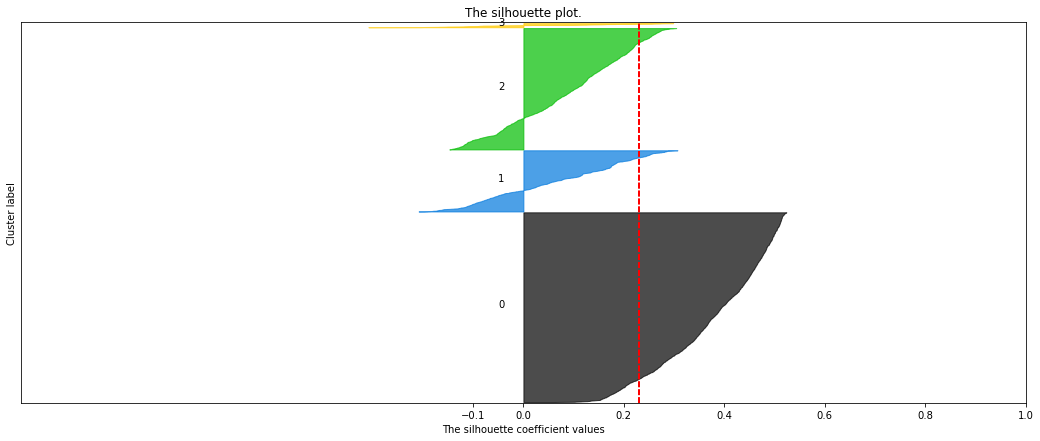

In [16]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
ax.set_xlim([-1, 1])
ax.set_ylim([0, len(X) + (nbClusters + 1) * 10])
# Compute the silhouette scores for each sample
sample_silhouette_values = metrics.silhouette_samples(X, y_pred)
y_lower = 10
#loop over clusters
for i in range(nbClusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / nbClusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouetteScore, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [18]:
y_true = ds_ml_lin[ds_ml_lin.columns[2]]
print(y_true.value_counts())
y_true = y_true.astype('category')
y_true = y_true.cat.codes
sklearn.metrics.confusion_matrix(y_true, y_pred)
y_true.unique()

moving_IN_OUT    2118
moving_OUT_IN    1433
stat_IN           748
stat_OUT          565
Name: actual, dtype: int64


array([1, 2, 3, 0], dtype=int8)

#### Doing PCA

In [13]:
pca = PCA(n_components=3)
X2 = pca.fit(X).transform(X)

In [14]:
y_pred = km.fit_predict(X2)

In [15]:
print("Calinski Harabasz score: %.2f" %metrics.calinski_harabasz_score(X2, y_pred))
print("Davies Bouldin score: %.2f" %metrics.davies_bouldin_score(X2, y_pred))
silhouetteScore = metrics.silhouette_score(X2, y_pred)
print("Silhouette Coefficient: %.2f" %silhouetteScore)

Calinski Harabasz score: 2047.36
Davies Bouldin score: 0.94
Silhouette Coefficient: 0.40


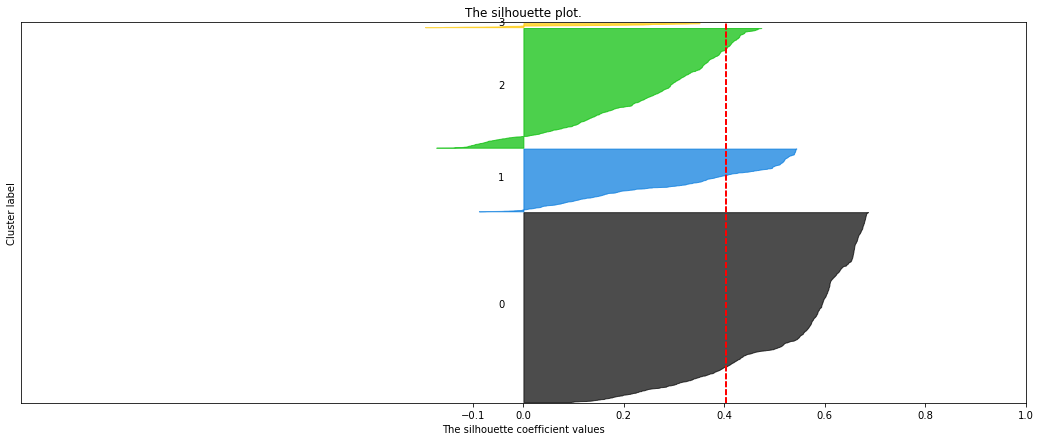

In [16]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
ax.set_xlim([-1, 1])
ax.set_ylim([0, len(X2) + (nbClusters + 1) * 10])
# Compute the silhouette scores for each sample
sample_silhouette_values = metrics.silhouette_samples(X2, y_pred)
y_lower = 10
#loop over clusters
for i in range(nbClusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / nbClusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouetteScore, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [17]:
sklearn.metrics.confusion_matrix(y_true, y_pred)

array([[1125,  174,  801,   18],
       [1048,  212,  170,    3],
       [ 154,   11,  551,   32],
       [ 126,  414,   25,    0]], dtype=int64)

#### Doing TSNE

In [164]:
tsne = TSNE(n_components=3)
X1 = tsne.fit_transform(X)

C:\Users\Polytech\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Polytech\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [166]:
y_pred = km.fit_predict(X1)

In [167]:
print("Calinski Harabasz score: %.2f" %metrics.calinski_harabasz_score(X1, y_pred))
print("Davies Bouldin score: %.2f" %metrics.davies_bouldin_score(X1, y_pred))
silhouetteScore = metrics.silhouette_score(X1, y_pred)
print("Silhouette Coefficient: %.2f" %silhouetteScore)

Calinski Harabasz score: 3130.41
Davies Bouldin score: 1.03
Silhouette Coefficient: 0.33


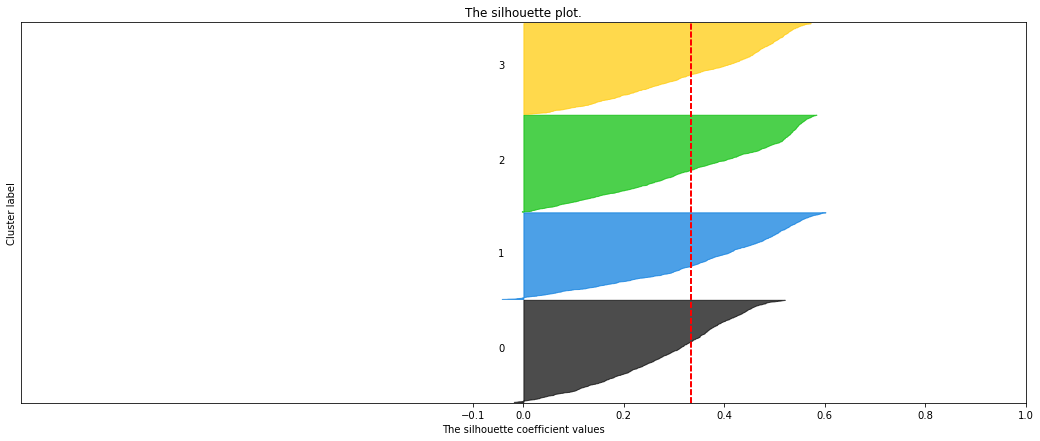

In [168]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
ax.set_xlim([-1, 1])
ax.set_ylim([0, len(X1) + (nbClusters + 1) * 10])
# Compute the silhouette scores for each sample
sample_silhouette_values = metrics.silhouette_samples(X1, y_pred)
y_lower = 10
#loop over clusters
for i in range(nbClusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / nbClusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouetteScore, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [169]:
sklearn.metrics.confusion_matrix(y_true, y_pred)

array([[1120,  294,  639,   65],
       [  37,  347,   24, 1025],
       [ 138,   45,  560,    5],
       [  26,  434,   27,   78]], dtype=int64)

In [23]:
ds_ml_not_lin = ds_ml[['run', 'EPC', 'actual', 'moving_stat','RSSImax_ain_window', 'RSSImax_aout_window',
                   'RSSImax_a1_window', 'RSSImax_a2_window', 'RSSImax_a3_window', 'RSSImax_a4_window',
                   'RSSImax_window','RSSIave_ain_window', 'RSSIave_aout_window','RSSIave_a1_window',
                   'RSSIave_a2_window', 'RSSIave_a3_window', 'RSSIave_a4_window','RSSIave_window',
                   'RSSImin_ain_window', 'RSSImin_aout_window','RSSImin_a1_window', 'RSSImin_a2_window',
                   'RSSImin_a3_window', 'RSSImin_a4_window','RSSImin_window','rc_ain_window', 'rc_aout_window',
                   'rc_a1_window', 'rc_a2_window', 'rc_a3_window', 'rc_a4_window', 'rc_window','RSSImax_ain_0',
                   'RSSImax_ain_1', 'RSSImax_ain_2', 'RSSImax_ain_3', 'RSSImax_ain_4', 'RSSImax_ain_5',
                   'RSSImax_ain_6', 'RSSImax_ain_7', 'RSSImax_ain_8', 'RSSImax_ain_9', 'RSSImax_ain_10',
                   'RSSImax_ain_11', 'RSSImax_aout_0', 'RSSImax_aout_1', 'RSSImax_aout_2', 'RSSImax_aout_3',
                   'RSSImax_aout_4', 'RSSImax_aout_5', 'RSSImax_aout_6', 'RSSImax_aout_7', 'RSSImax_aout_8',
                   'RSSImax_aout_9', 'RSSImax_aout_10', 'RSSImax_aout_11', 'RSSIave_ain_0', 'RSSIave_ain_1',
                   'RSSIave_ain_2', 'RSSIave_ain_3', 'RSSIave_ain_4', 'RSSIave_ain_5', 'RSSIave_ain_6',
                   'RSSIave_ain_7', 'RSSIave_ain_8', 'RSSIave_ain_9', 'RSSIave_ain_10', 'RSSIave_ain_11',
                   'RSSIave_aout_0', 'RSSIave_aout_1', 'RSSIave_aout_2', 'RSSIave_aout_3', 'RSSIave_aout_4',
                   'RSSIave_aout_5', 'RSSIave_aout_6', 'RSSIave_aout_7', 'RSSIave_aout_8', 'RSSIave_aout_9',
                   'RSSIave_aout_10', 'RSSIave_aout_11', 'RSSImin_ain_0', 'RSSImin_ain_1', 'RSSImin_ain_2',
                   'RSSImin_ain_3', 'RSSImin_ain_4', 'RSSImin_ain_5', 'RSSImin_ain_6', 'RSSImin_ain_7',
                   'RSSImin_ain_8', 'RSSImin_ain_9', 'RSSImin_ain_10', 'RSSImin_ain_11', 'RSSImin_aout_0',
                   'RSSImin_aout_1', 'RSSImin_aout_2', 'RSSImin_aout_3', 'RSSImin_aout_4', 'RSSImin_aout_5',
                   'RSSImin_aout_6', 'RSSImin_aout_7', 'RSSImin_aout_8', 'RSSImin_aout_9', 'RSSImin_aout_10',
                   'RSSImin_aout_11', 'rc_ain_0', 'rc_ain_1', 'rc_ain_2', 'rc_ain_3', 'rc_ain_4', 'rc_ain_5', 'rc_ain_6',
                   'rc_ain_7', 'rc_ain_8', 'rc_ain_9', 'rc_ain_10', 'rc_ain_11', 'rc_aout_0', 'rc_aout_1', 'rc_aout_2',
                   'rc_aout_3', 'rc_aout_4', 'rc_aout_5', 'rc_aout_6', 'rc_aout_7', 'rc_aout_8', 'rc_aout_9', 'rc_aout_10',
                   'rc_aout_11','RSSImax_a1_0', 'RSSImax_a1_1', 'RSSImax_a1_2', 'RSSImax_a1_3', 'RSSImax_a1_4',
                   'RSSImax_a1_5', 'RSSImax_a1_6', 'RSSImax_a1_7', 'RSSImax_a1_8', 'RSSImax_a1_9',
                   'RSSImax_a1_10', 'RSSImax_a1_11', 'RSSImax_a2_0', 'RSSImax_a2_1', 'RSSImax_a2_2',
                   'RSSImax_a2_3', 'RSSImax_a2_4', 'RSSImax_a2_5', 'RSSImax_a2_6', 'RSSImax_a2_7',
                   'RSSImax_a2_8', 'RSSImax_a2_9', 'RSSImax_a2_10', 'RSSImax_a2_11', 'RSSImax_a3_0',
                   'RSSImax_a3_1', 'RSSImax_a3_2', 'RSSImax_a3_3', 'RSSImax_a3_4', 'RSSImax_a3_5',
                   'RSSImax_a3_6', 'RSSImax_a3_7', 'RSSImax_a3_8', 'RSSImax_a3_9', 'RSSImax_a3_10',
                   'RSSImax_a3_11', 'RSSImax_a4_0', 'RSSImax_a4_1', 'RSSImax_a4_2', 'RSSImax_a4_3',
                   'RSSImax_a4_4', 'RSSImax_a4_5', 'RSSImax_a4_6', 'RSSImax_a4_7', 'RSSImax_a4_8',
                   'RSSImax_a4_9', 'RSSImax_a4_10', 'RSSImax_a4_11', 'RSSIave_a1_0', 'RSSIave_a1_1',
                   'RSSIave_a1_2', 'RSSIave_a1_3', 'RSSIave_a1_4', 'RSSIave_a1_5', 'RSSIave_a1_6',
                   'RSSIave_a1_7', 'RSSIave_a1_8', 'RSSIave_a1_9', 'RSSIave_a1_10', 'RSSIave_a1_11',
                   'RSSIave_a2_0', 'RSSIave_a2_1', 'RSSIave_a2_2', 'RSSIave_a2_3', 'RSSIave_a2_4',
                   'RSSIave_a2_5', 'RSSIave_a2_6', 'RSSIave_a2_7', 'RSSIave_a2_8', 'RSSIave_a2_9',
                   'RSSIave_a2_10', 'RSSIave_a2_11', 'RSSIave_a3_0', 'RSSIave_a3_1', 'RSSIave_a3_2',
                   'RSSIave_a3_3', 'RSSIave_a3_4', 'RSSIave_a3_5', 'RSSIave_a3_6', 'RSSIave_a3_7',
                   'RSSIave_a3_8', 'RSSIave_a3_9', 'RSSIave_a3_10', 'RSSIave_a3_11', 'RSSIave_a4_0',
                   'RSSIave_a4_1', 'RSSIave_a4_2', 'RSSIave_a4_3', 'RSSIave_a4_4', 'RSSIave_a4_5',
                   'RSSIave_a4_6', 'RSSIave_a4_7', 'RSSIave_a4_8', 'RSSIave_a4_9', 'RSSIave_a4_10',
                   'RSSIave_a4_11', 'RSSImin_a1_0', 'RSSImin_a1_1', 'RSSImin_a1_2', 'RSSImin_a1_3',
                   'RSSImin_a1_4', 'RSSImin_a1_5', 'RSSImin_a1_6', 'RSSImin_a1_7', 'RSSImin_a1_8',
                   'RSSImin_a1_9', 'RSSImin_a1_10', 'RSSImin_a1_11', 'RSSImin_a2_0', 'RSSImin_a2_1',
                   'RSSImin_a2_2', 'RSSImin_a2_3', 'RSSImin_a2_4', 'RSSImin_a2_5', 'RSSImin_a2_6',
                   'RSSImin_a2_7', 'RSSImin_a2_8', 'RSSImin_a2_9', 'RSSImin_a2_10', 'RSSImin_a2_11',
                   'RSSImin_a3_0', 'RSSImin_a3_1', 'RSSImin_a3_2', 'RSSImin_a3_3', 'RSSImin_a3_4',
                   'RSSImin_a3_5', 'RSSImin_a3_6', 'RSSImin_a3_7', 'RSSImin_a3_8', 'RSSImin_a3_9',
                   'RSSImin_a3_10', 'RSSImin_a3_11', 'RSSImin_a4_0', 'RSSImin_a4_1', 'RSSImin_a4_2',
                   'RSSImin_a4_3', 'RSSImin_a4_4', 'RSSImin_a4_5', 'RSSImin_a4_6', 'RSSImin_a4_7',
                   'RSSImin_a4_8', 'RSSImin_a4_9', 'RSSImin_a4_10', 'RSSImin_a4_11', 'rc_a1_0', 'rc_a1_1',
                   'rc_a1_2', 'rc_a1_3', 'rc_a1_4', 'rc_a1_5', 'rc_a1_6', 'rc_a1_7', 'rc_a1_8', 'rc_a1_9', 'rc_a1_10',
                   'rc_a1_11', 'rc_a2_0', 'rc_a2_1', 'rc_a2_2', 'rc_a2_3', 'rc_a2_4', 'rc_a2_5', 'rc_a2_6', 'rc_a2_7',
                   'rc_a2_8', 'rc_a2_9', 'rc_a2_10', 'rc_a2_11', 'rc_a3_0', 'rc_a3_1', 'rc_a3_2', 'rc_a3_3', 'rc_a3_4',
                   'rc_a3_5', 'rc_a3_6', 'rc_a3_7', 'rc_a3_8', 'rc_a3_9', 'rc_a3_10', 'rc_a3_11', 'rc_a4_0', 'rc_a4_1',
                   'rc_a4_2', 'rc_a4_3', 'rc_a4_4', 'rc_a4_5', 'rc_a4_6', 'rc_a4_7', 'rc_a4_8', 'rc_a4_9', 'rc_a4_10',
                   'rc_a4_11','RSSImax_0', 'RSSImax_1', 'RSSImax_2', 'RSSImax_3', 'RSSImax_4', 'RSSImax_5',
                   'RSSImax_6', 'RSSImax_7', 'RSSImax_8', 'RSSImax_9', 'RSSImax_10', 'RSSImax_11',
                   'RSSIave_0', 'RSSIave_1', 'RSSIave_2', 'RSSIave_3', 'RSSIave_4', 'RSSIave_5', 
                   'RSSIave_6', 'RSSIave_7', 'RSSIave_8', 'RSSIave_9', 'RSSIave_10', 'RSSIave_11', 
                   'RSSImin_0', 'RSSImin_1', 'RSSImin_2', 'RSSImin_3', 'RSSImin_4', 'RSSImin_5', 
                   'RSSImin_6', 'RSSImin_7', 'RSSImin_8', 'RSSImin_9', 'RSSImin_10', 'RSSImin_11',
                   'rc_0', 'rc_1', 'rc_2', 'rc_3', 'rc_4', 'rc_5', 'rc_6', 'rc_7', 'rc_8', 'rc_9', 'rc_10', 'rc_11']]

ds_ml_not_lin.head()

,run,EPC,actual,moving_stat,RSSImax_ain_window,RSSImax_aout_window,RSSImax_a1_window,RSSImax_a2_window,RSSImax_a3_window,RSSImax_a4_window,...,rc_2,rc_3,rc_4,rc_5,rc_6,rc_7,rc_8,rc_9,rc_10,rc_11
0,2022-07-02 14:25:38,E280689000000000669C6180,moving_OUT_IN,moving,-66.5,-68.5,-66.5,-85.0,-68.5,-85.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,2022-07-02 14:25:38,E280689000000000669C61EA,moving_OUT_IN,moving,-69.0,-64.0,-69.0,-85.0,-64.0,-85.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
2,2022-07-02 14:25:38,E280689000000000669C61FD,moving_OUT_IN,moving,-67.0,-66.5,-67.0,-85.0,-85.0,-66.5,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
3,2022-07-02 14:25:38,E280689000000000669C62F6,moving_OUT_IN,moving,-70.0,-85.0,-85.0,-70.0,-85.0,-85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2022-07-02 14:25:38,E280689000000000669C6369,stat_IN,stat,-70.5,-85.0,-70.5,-85.0,-85.0,-85.0,...,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0


In [31]:
X_nl = ds_ml_not_lin[ds_ml_not_lin.columns[4:]] # for now we do not include the "moving col"
X_nl

,RSSImax_ain_window,RSSImax_aout_window,RSSImax_a1_window,RSSImax_a2_window,RSSImax_a3_window,RSSImax_a4_window,RSSImax_window,RSSIave_ain_window,RSSIave_aout_window,RSSIave_a1_window,...,rc_2,rc_3,rc_4,rc_5,rc_6,rc_7,rc_8,rc_9,rc_10,rc_11
0,-66.5,-68.5,-66.5,-85.0,-68.5,-85.0,-66.5,-83.458333,-83.625000,-83.458333,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,-69.0,-64.0,-69.0,-85.0,-64.0,-85.0,-64.0,-83.666667,-80.750000,-83.666667,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
2,-67.0,-66.5,-67.0,-85.0,-85.0,-66.5,-66.5,-83.500000,-83.458333,-83.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
3,-70.0,-85.0,-85.0,-70.0,-85.0,-85.0,-70.0,-83.750000,-85.000000,-85.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-70.5,-85.0,-70.5,-85.0,-85.0,-85.0,-70.5,-76.333333,-85.000000,-76.333333,...,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,-67.0,-72.0,-67.0,-69.5,-85.0,-72.0,-67.0,-78.833333,-83.916667,-81.208333,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4860,-60.5,-62.0,-60.5,-85.0,-67.0,-62.0,-60.5,-77.208333,-79.833333,-77.208333,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
4861,-63.5,-65.5,-63.5,-70.5,-65.5,-85.0,-63.5,-77.958333,-81.750000,-79.166667,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
4862,-74.0,-85.0,-74.0,-77.0,-85.0,-85.0,-74.0,-79.583333,-85.000000,-79.500000,...,1.0,2.0,0.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0


In [32]:
y_pred = km.fit_predict(X_nl)

In [33]:
print("Calinski Harabasz score: %.2f" %metrics.calinski_harabasz_score(X_nl, y_pred))
print("Davies Bouldin score: %.2f" %metrics.davies_bouldin_score(X_nl, y_pred))
silhouetteScore = metrics.silhouette_score(X_nl, y_pred)
print("Silhouette Coefficient: %.2f" %silhouetteScore)

Calinski Harabasz score: 313.12
Davies Bouldin score: 3.23
Silhouette Coefficient: 0.11


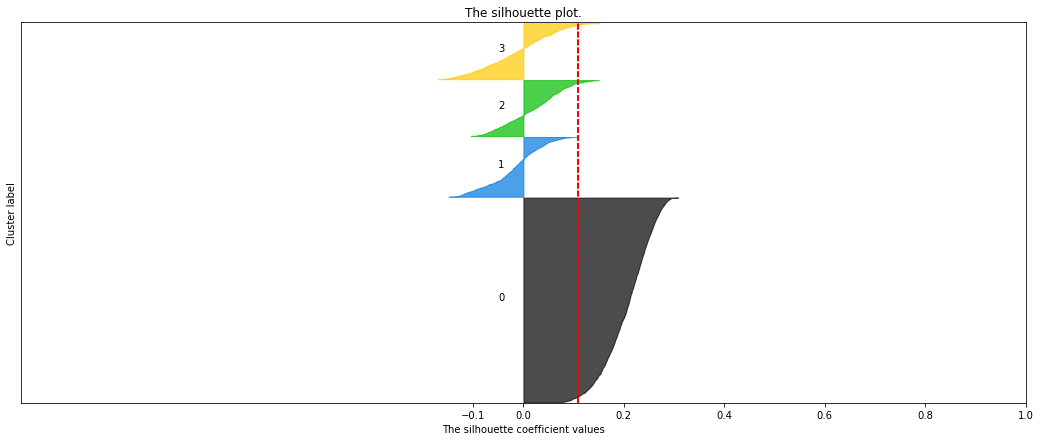

In [34]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
ax.set_xlim([-1, 1])
ax.set_ylim([0, len(X_nl) + (nbClusters + 1) * 10])
# Compute the silhouette scores for each sample
sample_silhouette_values = metrics.silhouette_samples(X_nl, y_pred)
y_lower = 10
#loop over clusters
for i in range(nbClusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / nbClusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouetteScore, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [35]:
y_true = ds_ml_not_lin[ds_ml_not_lin.columns[2]]
print(y_true.value_counts())
y_true = y_true.astype('category')
y_true = y_true.cat.codes

moving_IN_OUT    2118
moving_OUT_IN    1433
stat_IN           748
stat_OUT          565
Name: actual, dtype: int64


In [36]:
sklearn.metrics.confusion_matrix(y_true, y_pred)

array([[1174,  563,  365,   16],
       [1096,    7,   12,  318],
       [ 202,  199,  333,   14],
       [ 169,    4,   15,  377]], dtype=int64)

#### Doing PCA

In [37]:
X2 = pca.fit(X_nl).transform(X_nl)

In [38]:
y_pred = km.fit_predict(X2)

In [39]:
print("Calinski Harabasz score: %.2f" %metrics.calinski_harabasz_score(X2, y_pred))
print("Davies Bouldin score: %.2f" %metrics.davies_bouldin_score(X2, y_pred))
silhouetteScore = metrics.silhouette_score(X2, y_pred)
print("Silhouette Coefficient: %.2f" %silhouetteScore)

Calinski Harabasz score: 2314.08
Davies Bouldin score: 0.97
Silhouette Coefficient: 0.35


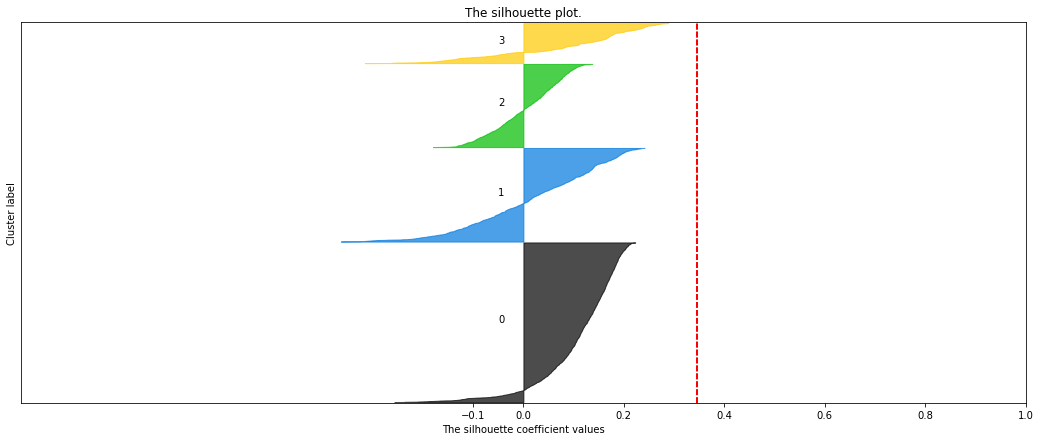

In [40]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
ax.set_xlim([-1, 1])
ax.set_ylim([0, len(X) + (nbClusters + 1) * 10])
# Compute the silhouette scores for each sample
sample_silhouette_values = metrics.silhouette_samples(X, y_pred)
y_lower = 10
#loop over clusters
for i in range(nbClusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / nbClusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouetteScore, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [41]:
sklearn.metrics.confusion_matrix(y_true, y_pred)

array([[1333,  710,    8,   67],
       [ 304,   13, 1045,   71],
       [ 252,  475,   17,    4],
       [ 173,   12,    5,  375]], dtype=int64)

#### Doing TSNE

In [42]:
X1 = tsne.fit_transform(X_nl)

C:\Users\Polytech\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Polytech\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [43]:
y_pred = km.fit_predict(X1)

In [44]:
print("Calinski Harabasz score: %.2f" %metrics.calinski_harabasz_score(X2, y_pred))
print("Davies Bouldin score: %.2f" %metrics.davies_bouldin_score(X2, y_pred))
silhouetteScore = metrics.silhouette_score(X2, y_pred)
print("Silhouette Coefficient: %.2f" %silhouetteScore)

Calinski Harabasz score: 1067.97
Davies Bouldin score: 1.75
Silhouette Coefficient: 0.18


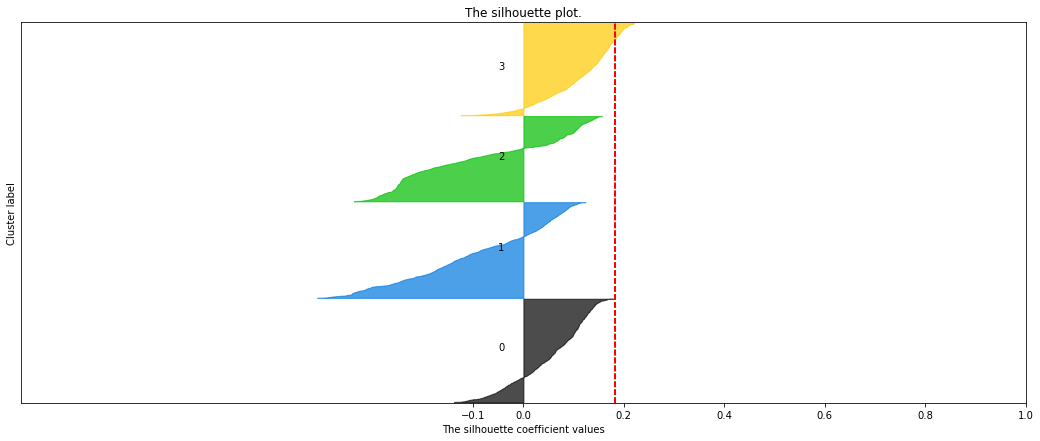

In [45]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
ax.set_xlim([-1, 1])
ax.set_ylim([0, len(X) + (nbClusters + 1) * 10])
# Compute the silhouette scores for each sample
sample_silhouette_values = metrics.silhouette_samples(X, y_pred)
y_lower = 10
#loop over clusters
for i in range(nbClusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / nbClusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouetteScore, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [46]:
sklearn.metrics.confusion_matrix(y_true, y_pred)

array([[1314,  496,  281,   27],
       [   1,   58,  255, 1119],
       [  16,  659,   35,   38],
       [   4,   24,  531,    6]], dtype=int64)

### GradientBoosting classifier

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, ds_ml_lin[ds_ml_lin.columns[2]], test_size=0.25, random_state=42)
X_train.shape, y_train.shape

((3648, 364), (3648,))

In [71]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [76]:
y_pred = clf.predict(X_test)
print("ACC on test = %.3f " % accuracy_score(y_test, y_pred))

ACC on test = 0.956 


C:\Users\Polytech\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


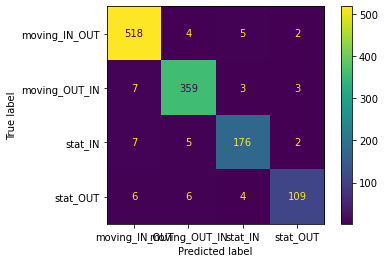

In [74]:
plot_confusion_matrix(clf,X_test,y_test)

## Deep learning

In [103]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow_addons.metrics import F1Score
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

### First for the linear measurements

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, ds_ml_lin[ds_ml_lin.columns[2]], test_size=0.25, random_state=42)

#### Data preprocessing

In [79]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [80]:
X_train.shape

(3648, 364)

In [81]:
X_test.shape

(1216, 364)

In [82]:
# One hot encode the label
ohe = OneHotEncoder()
print(y_train.shape)
y_train = ohe.fit_transform(y_train.values.reshape(-1,1))
y_train = y_train.toarray()
print(y_train.shape)

print(y_test.shape)
y_test = ohe.transform(y_test.values.reshape(-1,1))
y_test = y_test.toarray()
print(y_test.shape)

(3648,)
(3648, 4)
(1216,)
(1216, 4)


In [83]:
inputs = keras.Input(shape=(364, ))
x = Dense(32, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
outputs = Dense(4, activation='softmax')(x)

model = keras.Model(inputs, outputs)

model.compile(optimizer = 'adam', loss = 'accuracy')

callbacks_list = [EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=30,
                                verbose=2, mode='max', restore_best_weights=True)
                 ]

model.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer='adam') # metrics can be a list of more than 1
history = model.fit(X_train, y_train, validation_split = 0.1, callbacks=callbacks_list,
                    batch_size=64, epochs=200)

Epoch 1/200
52/52 [==============================] - 1s 11ms/step - loss: 1.1545 - accuracy: 0.6783 - val_loss: 0.7763 - val_accuracy: 0.8110
Epoch 2/200
52/52 [==============================] - 0s 6ms/step - loss: 0.5281 - accuracy: 0.8550 - val_loss: 0.3022 - val_accuracy: 0.9315
Epoch 3/200
52/52 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.9144 - val_loss: 0.2086 - val_accuracy: 0.9342
Epoch 4/200
52/52 [==============================] - 0s 2ms/step - loss: 0.2195 - accuracy: 0.9217 - val_loss: 0.1824 - val_accuracy: 0.9479
Epoch 5/200
52/52 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9366 - val_loss: 0.1606 - val_accuracy: 0.9507
Epoch 6/200
52/52 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.9400 - val_loss: 0.1463 - val_accuracy: 0.9507
Epoch 7/200
52/52 [==============================] - 0s 2ms/step - loss: 0.1638 - accuracy: 0.9482 - val_loss: 0.1393 - val_accuracy: 0.9562
Epoch 8/200


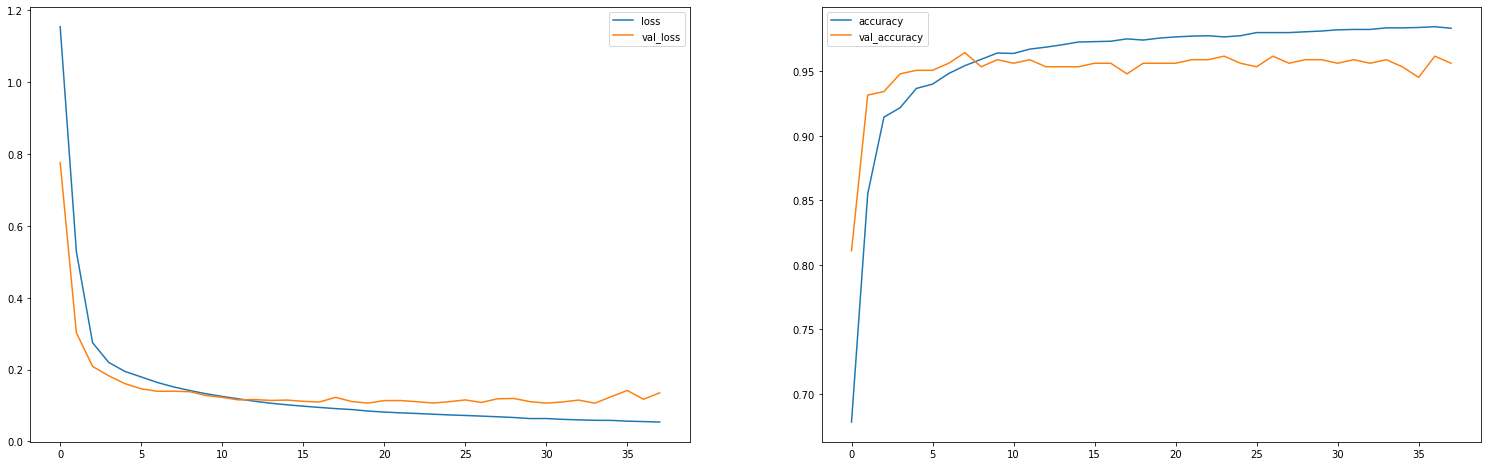

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26,8))

ax1.plot(history.history['loss'], label="loss")
ax1.plot(history.history['val_loss'], label="val_loss")
ax1.legend()
ax2.plot(history.history['accuracy'], label="accuracy")
ax2.plot(history.history['val_accuracy'], label="val_accuracy")
ax2.legend()
plt.show()

In [85]:
# Evaluate the model by checking the accuracy
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy', score[1])

38/38 [==============================] - 0s 2ms/step - loss: 0.1987 - accuracy: 0.9465
Test loss: 0.19873955845832825
Test accuracy 0.9465460777282715


In [86]:
y_pred = model.predict(X_test)
y_pred

array([[9.68332827e-01, 1.65798597e-03, 3.99364578e-03, 2.60155145e-02],
       [3.88878942e-01, 4.27834094e-02, 4.44306910e-01, 1.24030739e-01],
       [9.87813830e-01, 4.68163547e-04, 1.00971265e-02, 1.62086904e-03],
       ...,
       [1.43224699e-02, 1.73092203e-03, 9.82845604e-01, 1.10099150e-03],
       [9.99568164e-01, 2.87872845e-05, 3.20694118e-04, 8.23755909e-05],
       [9.99900818e-01, 5.98922315e-06, 8.31709622e-05, 9.95893697e-06]],
      dtype=float32)

In [87]:
a = y_pred
y_pred_r = np.zeros_like(a)
y_pred_r[np.arange(len(a)), a.argmax(1)] = 1 # set the max of each array to 1, rest to 0
y_pred_r

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [88]:
sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), y_pred_r.argmax(axis=1))

array([[515,   1,   9,   4],
       [  7, 359,   3,   3],
       [ 11,   9, 169,   1],
       [  4,   8,   5, 108]], dtype=int64)

## Hyper-parameters search

In [121]:
from keras.models import Sequential
from keras.wrappers.scikit_learn  import KerasClassifier
import keras_tuner as kt
def build_model(hp): # Wrap a model 
#function
  NUM_LAYERS = hp.Int("num_layers", 1, 4) # Define hyper-parameters
  NUM_DIMS = hp.Int("num_dims", min_value=32, max_value=128, step=32)
  ACTIVATION = hp.Choice("activation", ["relu", "tanh"])
  DROPOUT = hp.Boolean("dropout")
  DROP_RATE = hp.Choice("drop_rate", values=[0.2, 0.25, 0.5])
  input_layer = Input(shape=(X_train.shape[1],), name='input') 
  h = input_layer # with hyper-parameters
  for i in range(NUM_LAYERS):
     h = Dense(NUM_DIMS//(2*i+1), activation=ACTIVATION)(h)
     if DROPOUT:
            h = Dropout(rate=DROP_RATE)(h)
  outputs = Dense(4, activation='softmax', name='output')(h)
  model1=Model(input_layer,outputs)
  model1.compile(
        optimizer='adam',
        loss="categorical_crossentropy",
        metrics=["accuracy"],
               )
  return model1
# model1 = KerasClassifier(build_fn = build_model)

In [122]:
tuner = kt.BayesianOptimization(build_model,kt.Objective("val_accuracy", direction="max"),max_trials=10
                                ,overwrite=True)

In [123]:
# Search for hyper-parameters
ea = EarlyStopping(monitor='val_accuracy', mode='max', 
                   patience=30, restore_best_weights=True)

In [124]:
tuner.search(X_train, y_train, epochs=40, validation_data=(X_test,y_test),
callbacks=[ea])

Trial 10 Complete [00h 00m 08s]
val_accuracy: 0.9588815569877625

Best val_accuracy So Far: 0.9621710777282715
Total elapsed time: 00h 01m 30s
INFO:tensorflow:Oracle triggered exit


### Now for the linear measurements

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_nl, ds_ml_not_lin[ds_ml_not_lin.columns[2]], test_size=0.25, random_state=42)

#### Data preprocessing

In [143]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(3648, 364)
(1216, 364)


In [144]:
# One hot encode the label
ohe = OneHotEncoder()
print(y_train.shape)
y_train = ohe.fit_transform(y_train.values.reshape(-1,1))
y_train = y_train.toarray()
print(y_train.shape)

print(y_test.shape)
y_test = ohe.transform(y_test.values.reshape(-1,1))
y_test = y_test.toarray()
print(y_test.shape)

(3648,)
(3648, 4)
(1216,)
(1216, 4)


In [145]:
inputs = keras.Input(shape=(364, ))
x = Dense(32, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
outputs = Dense(4, activation='softmax')(x)

model = keras.Model(inputs, outputs)

model.compile(optimizer = 'adam', loss = 'accuracy')

callbacks_list = [EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=30,
                                verbose=2, mode='max', restore_best_weights=True)
                 ]

model.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer='adam') # metrics can be a list of more than 1
history = model.fit(X_train, y_train, validation_split = 0.1, callbacks=callbacks_list,
                    batch_size=64, epochs=200)

Epoch 1/200
52/52 [==============================] - 0s 4ms/step - loss: 0.8385 - accuracy: 0.7167 - val_loss: 0.3462 - val_accuracy: 0.9233
Epoch 2/200
52/52 [==============================] - 0s 2ms/step - loss: 0.2613 - accuracy: 0.9141 - val_loss: 0.1902 - val_accuracy: 0.9315
Epoch 3/200
52/52 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.9235 - val_loss: 0.1670 - val_accuracy: 0.9397
Epoch 4/200
52/52 [==============================] - 0s 2ms/step - loss: 0.1762 - accuracy: 0.9354 - val_loss: 0.1553 - val_accuracy: 0.9425
Epoch 5/200
52/52 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9415 - val_loss: 0.1427 - val_accuracy: 0.9507
Epoch 6/200
52/52 [==============================] - 0s 2ms/step - loss: 0.1486 - accuracy: 0.9504 - val_loss: 0.1398 - val_accuracy: 0.9534
Epoch 7/200
52/52 [==============================] - 0s 2ms/step - loss: 0.1372 - accuracy: 0.9577 - val_loss: 0.1377 - val_accuracy: 0.9562
Epoch 8/200
5

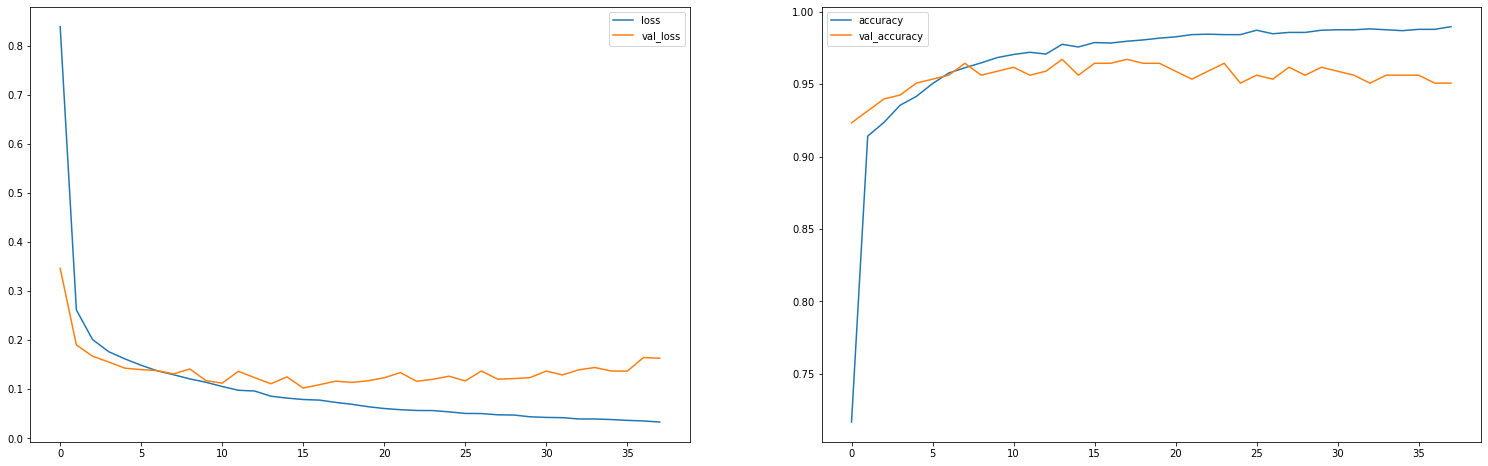

In [146]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26,8))

ax1.plot(history.history['loss'], label="loss")
ax1.plot(history.history['val_loss'], label="val_loss")
ax1.legend()
ax2.plot(history.history['accuracy'], label="accuracy")
ax2.plot(history.history['val_accuracy'], label="val_accuracy")
ax2.legend()
plt.show()

In [147]:
# Evaluate the model by checking the accuracy
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy', score[1])

38/38 [==============================] - 0s 1ms/step - loss: 0.1872 - accuracy: 0.9400
Test loss: 0.18716545403003693
Test accuracy 0.9399670958518982


In [148]:
y_pred = model.predict(X_test)
y_pred

array([[9.87624764e-01, 9.60226171e-04, 1.45633181e-03, 9.95861180e-03],
       [3.80429089e-01, 7.05906078e-02, 4.42502528e-01, 1.06477715e-01],
       [9.81175244e-01, 5.45480812e-04, 1.10167880e-02, 7.26240035e-03],
       ...,
       [5.14162472e-03, 9.15839570e-04, 9.92819965e-01, 1.12253509e-03],
       [9.99356925e-01, 6.47883098e-06, 5.37568529e-04, 9.90664848e-05],
       [9.99707758e-01, 9.91254524e-07, 2.73512822e-04, 1.76759349e-05]],
      dtype=float32)

In [149]:
a = y_pred
y_pred_r = np.zeros_like(a)
y_pred_r[np.arange(len(a)), a.argmax(1)] = 1 # set the max of each array to 1, rest to 0
y_pred_r

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [150]:
sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), y_pred_r.argmax(axis=1))

array([[515,   3,   5,   6],
       [  4, 358,   4,   6],
       [ 17,   9, 163,   1],
       [  1,  10,   7, 107]], dtype=int64)

## hyperparameter search

In [151]:
tuner = kt.BayesianOptimization(build_model,kt.Objective("val_accuracy", direction="max"),max_trials=10
                                ,overwrite=True)
# Search for hyper-parameters
ea = EarlyStopping(monitor='val_accuracy', mode='max', 
                   patience=30, restore_best_weights=True)

In [152]:
tuner.search(X_train, y_train, epochs=40, validation_data=(X_test,y_test),
callbacks=[ea])

Trial 10 Complete [00h 00m 08s]
val_accuracy: 0.9621710777282715

Best val_accuracy So Far: 0.9621710777282715
Total elapsed time: 00h 01m 30s
INFO:tensorflow:Oracle triggered exit
